<a href="https://colab.research.google.com/github/055DavidMario/055DavidMario/blob/main/KNN_prediksi_Type_Laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [4]:
# Load the dataset from the CSV file
df = pd.read_csv('laptop_data_cleaned.csv')
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [5]:
# Create a new column for the encoded 'Cpu_brand'
col_encoder = LabelEncoder()
df['Company_label'] = col_encoder.fit_transform(df['Company']) #change into numerik data
df['Cpu'] = col_encoder.fit_transform(df['Cpu_brand']) #change into numerik data
df['TypeName_label'] = col_encoder.fit_transform(df['TypeName']) #change into numerik data
df['Os_label'] = col_encoder.fit_transform(df['Os']) #change into numerik data

# AMD Processor = 0
# Intel Core i3 = 1
# Intel Core i5 = 2
# Intel Core i7 = 3
# Other Intel Processor = 4

# Display the DataFrame with the new encoded column
# print(df)

# Menampilkan hasil label encode dari masing-masing kolom
# Menampilkan hasil label encode yang terurut berdasarkan numeriknya
sorted_company_labels = sorted(zip(df['Company'], df['Company_label']), key=lambda x: x[1])
print("Company_label encoding:")
print(dict(sorted_company_labels))

sorted_cpu_labels = sorted(zip(df['Cpu_brand'], df['Cpu']), key=lambda x: x[1])
print("\nCpu encoding:")
print(dict(sorted_cpu_labels))

sorted_type_labels = sorted(zip(df['TypeName'], df['TypeName_label']), key=lambda x: x[1])
print("\nTypeName_label encoding:")
print(dict(sorted_type_labels))

sorted_os_labels = sorted(zip(df['Os'], df['Os_label']), key=lambda x: x[1])
print("\nOs_label encoding:")
print(dict(sorted_os_labels))

Company_label encoding:
{'Acer': 0, 'Apple': 1, 'Asus': 2, 'Chuwi': 3, 'Dell': 4, 'Fujitsu': 5, 'Google': 6, 'HP': 7, 'Huawei': 8, 'LG': 9, 'Lenovo': 10, 'MSI': 11, 'Mediacom': 12, 'Microsoft': 13, 'Razer': 14, 'Samsung': 15, 'Toshiba': 16, 'Vero': 17, 'Xiaomi': 18}

Cpu encoding:
{'AMD Processor': 0, 'Intel Core i3': 1, 'Intel Core i5': 2, 'Intel Core i7': 3, 'Other Intel Processor': 4}

TypeName_label encoding:
{'2 in 1 Convertible': 0, 'Gaming': 1, 'Netbook': 2, 'Notebook': 3, 'Ultrabook': 4, 'Workstation': 5}

Os_label encoding:
{'Mac': 0, 'Others': 1, 'Windows': 2}


In [6]:
print(df)

     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

In [7]:
# Select relevant features and target variable
features = ['Ram', 'HDD', 'SSD', 'Company_label', 'Cpu', 'Os_label']
target = 'TypeName'

# Extract features and target variable
x = df[features]
y = df[target]

In [8]:
# Perform GridSearchCV for hyperparameter tuning (Find the best param)

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [9]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'n_neighbors': 11, 'weights': 'uniform'}

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Create a new KNN model with the best parameters and train it
knn_model = KNeighborsClassifier(**best_params)

In [12]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [13]:
# Make predictions on the test set
y_pred = knn_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the Test Set: {accuracy:.2%}')

# Print the classification report and confusion matrix for the test set
print('\nClassification Report for Test Set:\n')
print(classification_report(y_test, y_pred))

Accuracy on the Test Set: 68.24%

Classification Report for Test Set:

                    precision    recall  f1-score   support

2 in 1 Convertible       0.31      0.30      0.30        27
            Gaming       0.81      0.67      0.73        39
           Netbook       0.00      0.00      0.00         4
          Notebook       0.75      0.85      0.79       149
         Ultrabook       0.50      0.42      0.46        33
       Workstation       0.00      0.00      0.00         3

          accuracy                           0.68       255
         macro avg       0.40      0.37      0.38       255
      weighted avg       0.66      0.68      0.67       255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for Test Set:

[[  8   1   0  16   2   0]
 [  3  26   0   8   2   0]
 [  0   0   0   4   0   0]
 [  8   5   1 126   9   0]
 [  6   0   0  13  14   0]
 [  1   0   0   1   1   0]]


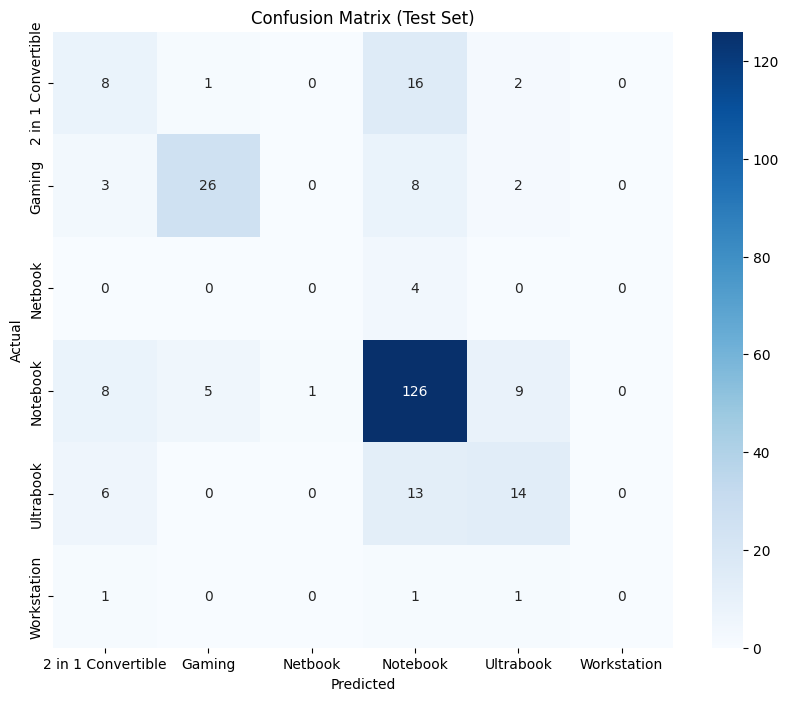

In [14]:
labels = ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']
# Display heatmap for the average confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Test Set:\n')
print(conf_matrix)

# Display heatmap for the confusion matrix with actual and predicted values
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [15]:
import joblib

# Save the model to a file
joblib.dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

In [17]:
# Load the saved model
loaded_model = joblib.load('knn_model.joblib')

# Get user input
user_input = [
    float(input('Enter RAM size in GB: ')),
    float(input('Enter HDD size in GB: ')),
    float(input('Enter SSD size in GB: ')),
    input('Enter CPU brand: '),
    input('Enter Company Name: '),
    input('Enter Os type: ')
]

# Cari nilai numerik untuk merepresentasikan merek CPU dari input pengguna
cpu_label = df.loc[df['Cpu_brand'] == user_input[3], 'Cpu'].values[0]
user_input[3] = cpu_label

# Cari nilai numerik untuk merepresentasikan perusahaan (Company) dari input pengguna
company_label = df.loc[df['Company'] == user_input[4], 'Company_label'].values[0]
user_input[4] = company_label

# Cari nilai numerik untuk merepresentasikan sistem operasi (Os) dari input pengguna
os_label = df.loc[df['Os'] == user_input[5], 'Os_label'].values[0]
user_input[5] = os_label

# Make a prediction using the loaded model
user_input = [user_input]  # Convert to a 2D array
predicted_label = loaded_model.predict(user_input)
print(predicted_label)

print(f'The predicted laptop type is: {predicted_label[0]}')

Enter RAM size in GB: 6
Enter HDD size in GB: 0
Enter SSD size in GB: 500
Enter CPU brand: Intel Core i5
Enter Company Name: Apple
Enter Os type: Mac
['Ultrabook']
The predicted laptop type is: Ultrabook


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
